In [7]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\User\Downloads\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def to_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    
df['job_skills'] = df['job_skills'].apply(to_list)
df_india = df[df['job_country'] == 'India'].dropna(subset= ['salary_year_avg']).copy()

In [32]:
df_india_da = df_india[df_india['job_title_short'] == 'Data Analyst']
df_t6 = df_india.groupby('job_title_short')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count', ascending= False)
df_t6

,count,median
job_title_short,,
Data Engineer,169,147500.0
Data Analyst,94,100500.0
Data Scientist,92,114008.0
Senior Data Engineer,57,147500.0
Machine Learning Engineer,57,79200.0
Software Engineer,45,79200.0
Senior Data Scientist,33,149653.0
Senior Data Analyst,27,111175.0
Business Analyst,8,64800.0


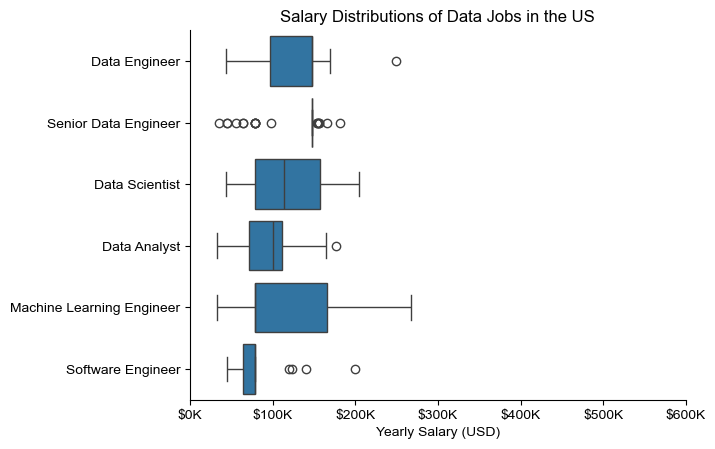

In [20]:
df_india_da = df_india[df_india['job_title_short'] == 'Data Analyst']

# Median salary for top 6 data jobs in india
job_titles = df_india['job_title_short'].value_counts().index[:6].tolist()
df_top6 = df_india[df_india['job_title_short'].isin(job_titles)]
job_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending= False).index

# job_titles
sns.boxplot(data=df_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [ ]:
df_india_da = df_india_da.explode('job_skills')
df_skills_pay = df_india_da.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'median', ascending= False).head(10)
df_skills_pay


,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0


In [38]:
df_skills_demand = df_india_da.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count', ascending= False).head(10)
df_skills_demand_1 = df_skills_demand.sort_values('median', ascending= False)
df_skills_demand_1

,count,median
job_skills,,
spark,11,111175.0
power bi,17,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


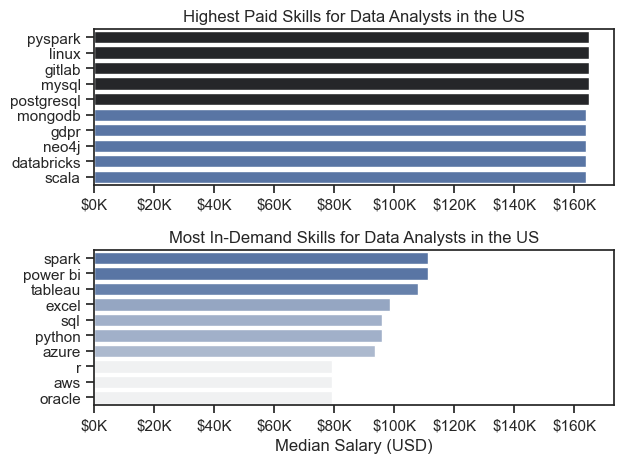

In [43]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_skills_pay, x='median', y=df_skills_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_skills_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_skills_demand_1, x='median', y=df_skills_demand_1.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_skills_demand_1[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()